# Classification Algorithm To Predict Stock Market Movements

In this notebook, I will demonstrated how to impletement a basic machine learning classification algorithm on the S&P 500 Index using Support Vector Classifier (SVC).  SVCs are supervised learning classification models. A set of training data is provided to the machine learning classification algorithm, each belonging to one of the categories. For instance, the categories can be to either buy or sell a stock. The classification algorithm builds a model based on the training data and then, classifies the test data into one of the categories.

### Step 1: Import the libraries

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import scorer
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn


### Step 2: Download The Dataset

We will download the historical price of S&P 500 (2012-01-02 - 2017-10-01) data from Yahoo Fiance (https://finance.yahoo.com/quote/SPY/history?period1=1357016400&period2=1546318800&interval=1d&filter=history&frequency=1d)

After that, we will drop the missing values from the data and plot the S&P500 close price series.

In [29]:
Df = pd.read_csv("SPY.csv")       
Df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,127.760002,128.380005,127.430000,127.500000,110.244629,193697900
1,2012-01-04,127.199997,127.809998,126.709999,127.699997,110.417557,127186500
2,2012-01-05,127.010002,128.229996,126.430000,128.039993,110.711548,173895000
3,2012-01-06,128.199997,128.220001,127.290001,127.709999,110.426208,148050000
4,2012-01-09,128.000000,128.179993,127.410004,128.020004,110.694260,99530200


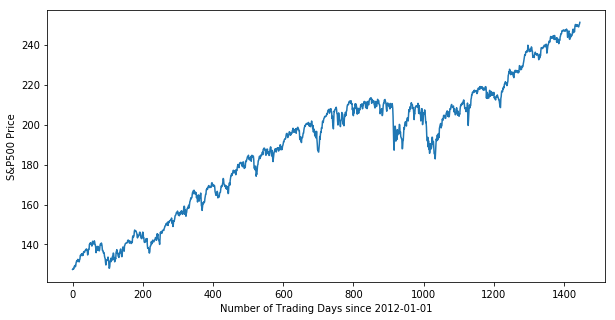

In [33]:
Df.Close.plot(figsize=(10,5))
plt.ylabel("S&P500 Price")
plt.xlabel("Number of Trading Days since 2012-01-01")
plt.show()

### Step 3: Determine the target variable

The target variable is the variable which the mchine learning classification algorithm will predict. In this example, the target variable is whether S&P 500 price of the next trading day will close above or close below today's closing price.

We will first determine the actual trading signal using the following logic – If the predicted next trading day’s close price is greater than today’s close price then, we will buy the S&P 500 index during pre-market hours, else we will sell the S&P500 index during pre-market hours. We will store +1 for the buy signal and -1 for the sell signal.

In [22]:
y = np.where(Df['Close'].shift(-1) > Df['Close'],1,-1)

### Step 4: Creation of predictors variables

The X is a dataset that holds the predictor’s variables which are used to predict target variable, ‘y’. The X consists of variables current day ‘Open – Close’ and  current day ‘High – Low’. These can be understood as indicators based on which the algorithm will predict next trading day's stock price.

In [23]:
Df['Open-Close'] = Df.Open - Df.Close

Df['High-Low'] = Df.High - Df.Low

X=Df[['Open-Close','High-Low']]

In the later part of the code, the machine learning classification algorithm will use the predictors and target variable in the training phase to create the model and then, predict the target variable with the test dataset.

### Step 5: Split test and train datasets

We will split data into the train dataset and the test dataset with a 80/20 split

In [24]:
split_percentage = 0.8
split = int(split_percentage*len(Df))

# Train data set
X_train = X[:split]
y_train = y[:split]

# Test data set
X_test = X[split:]
y_test = y[split:]

### Step 6: Create classification model using the train dataset

Create model using Support Vector Classifier (SVC). This model will be later used to predict the trading signal in the test dataset.

In [25]:
cls = SVC().fit(X_train, y_train)

c:\users\syson\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Step 7: The classification model accuracy

We will compute the accuracy of the classification model on the train and test dataset, by comparing the actual values of the trading signal with the predicted values of the trading signal. The function accuracy_score() will be used to calculate the accuracy.

1. target_actual_value: correct signal values
2. target_predicted_value: predicted signal values

In [26]:
accuracy_train = accuracy_score(y_train, cls.predict(X_train))
accuracy_test = accuracy_score(y_test, cls.predict(X_test))

In [27]:
print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 55.88%
Test Accuracy: 53.45%


An accuracy of 50%+ in test data suggests that the classification model is effective.

### Step 8: Prediction

We will predict the signal (buy or sell) for the test data set, using the cls.predict() function. Then, we will compute the strategy returns based on the signal predicted by the model in the test dataset. We save it in the column ‘Strategy_Return’ and then, plot the cumulative strategy returns.

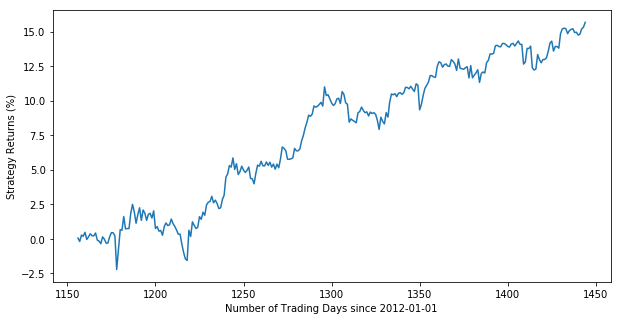

In [32]:
Df['Predicted_Signal'] = cls.predict(X)
# Calculate log returns

Df['Return'] = np.log(Df.Close.shift(-1) / Df.Close)*100

Df['Strategy_Return'] = Df.Return * Df.Predicted_Signal

Df.Strategy_Return.iloc[split:].cumsum().plot(figsize=(10,5))

plt.ylabel("Strategy Returns (%)")
plt.xlabel("Number of Trading Days since 2012-01-01")

plt.show()

As seen from the graph, using the test dataset the classification algorithm generates a return of around 15% after 253 trading days (assuming that the algorithm risk 2% of total capital per trade).